In [162]:
import pandas as pd

# First Plot

In [163]:
data = pd.read_csv("Downward Trends in our Metrics for MBR - 2022-2024.csv")

In [164]:
data.head()

,Date,level0_name,level1_name,impression,click,atc,gmv,order_count,tpv,order_verified_count,CTR,ATC/impression,ATC/Click,order/impression,order/click
0,11/1/2021,Fashion,Fashion Anak & Bayi,275792088,8580731,1967070,24076818583,298927,21904006681,273567,3.11%,0.71%,22.92%,0.10%,3.19%
1,11/1/2021,Fashion,Fashion Muslim,177710859,7018137,1274480,18580907385,183845,16382346225,163003,3.95%,0.72%,18.16%,0.09%,2.32%
2,11/1/2021,Fashion,Fashion Pria,1264500398,41069855,4640784,134881538955,803714,115258747763,697802,3.25%,0.37%,11.30%,0.06%,1.70%
3,11/1/2021,Fashion,Fashion Wanita,880892870,28022095,4127172,81326874409,541707,70263499611,480920,3.18%,0.47%,14.73%,0.05%,1.72%
4,11/1/2021,Groceries,Ibu & Bayi,219013810,8812313,2870454,87057064170,622565,81548797157,585661,4.02%,1.31%,32.57%,0.27%,6.65%


In [165]:
from datetime import timedelta
data['Date'] = pd.to_datetime(data['Date'])
data = data[['Date','level0_name','gmv']].groupby(['Date','level0_name']).sum()
data = data.reset_index()
data["year_agg"] = (data['Date']+ timedelta(days=62)).dt.year
data['month_agg'] = (data['Date'].dt.month).astype('string')+'_'+data['Date'].dt.month_name()

In [166]:
data[data['level0_name']=='Groceries'].head(20)

,Date,level0_name,gmv,year_agg,month_agg
2,2021-11-01,Groceries,674334865691,2022,11_November
5,2021-12-01,Groceries,677828635373,2022,12_December
8,2022-01-01,Groceries,651954756240,2022,1_January
11,2022-02-01,Groceries,749995167485,2022,2_February
14,2022-03-01,Groceries,632317776374,2022,3_March
17,2022-11-01,Groceries,543390917479,2023,11_November
20,2022-12-01,Groceries,468208557471,2023,12_December
23,2023-01-01,Groceries,463117402498,2023,1_January
26,2023-02-01,Groceries,435590512732,2023,2_February
29,2023-03-01,Groceries,453396446943,2023,3_March


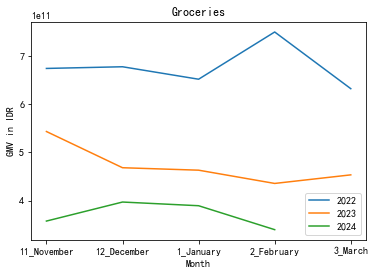

In [167]:
import matplotlib.pyplot as plt
category = 'Groceries'
for year in data['year_agg'].unique():
    x = data[(data['level0_name']==category)&(data['year_agg']==year)]['month_agg'].to_list()
    y = data[(data['level0_name']==category)&(data['year_agg']==year)]['gmv'].to_list()
    plt.plot(x, y, label = year) 

plt.ylabel('GMV in IDR') 
plt.xlabel('Month') 
plt.title('Groceries')
plt.legend() 
plt.show()

# Second Plot